# Response to reviewers

This notebook makes figures to answer reviewers questions.

## 0 Packages

In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks

## 1 Compare glycerol-water surface with beet juice surface

In [6]:
base_folder = "/Users/zhengyangliu/Library/CloudStorage/GoogleDrive-liuzy19911112@gmail.com/My Drive/Research projects/WPM/Data"

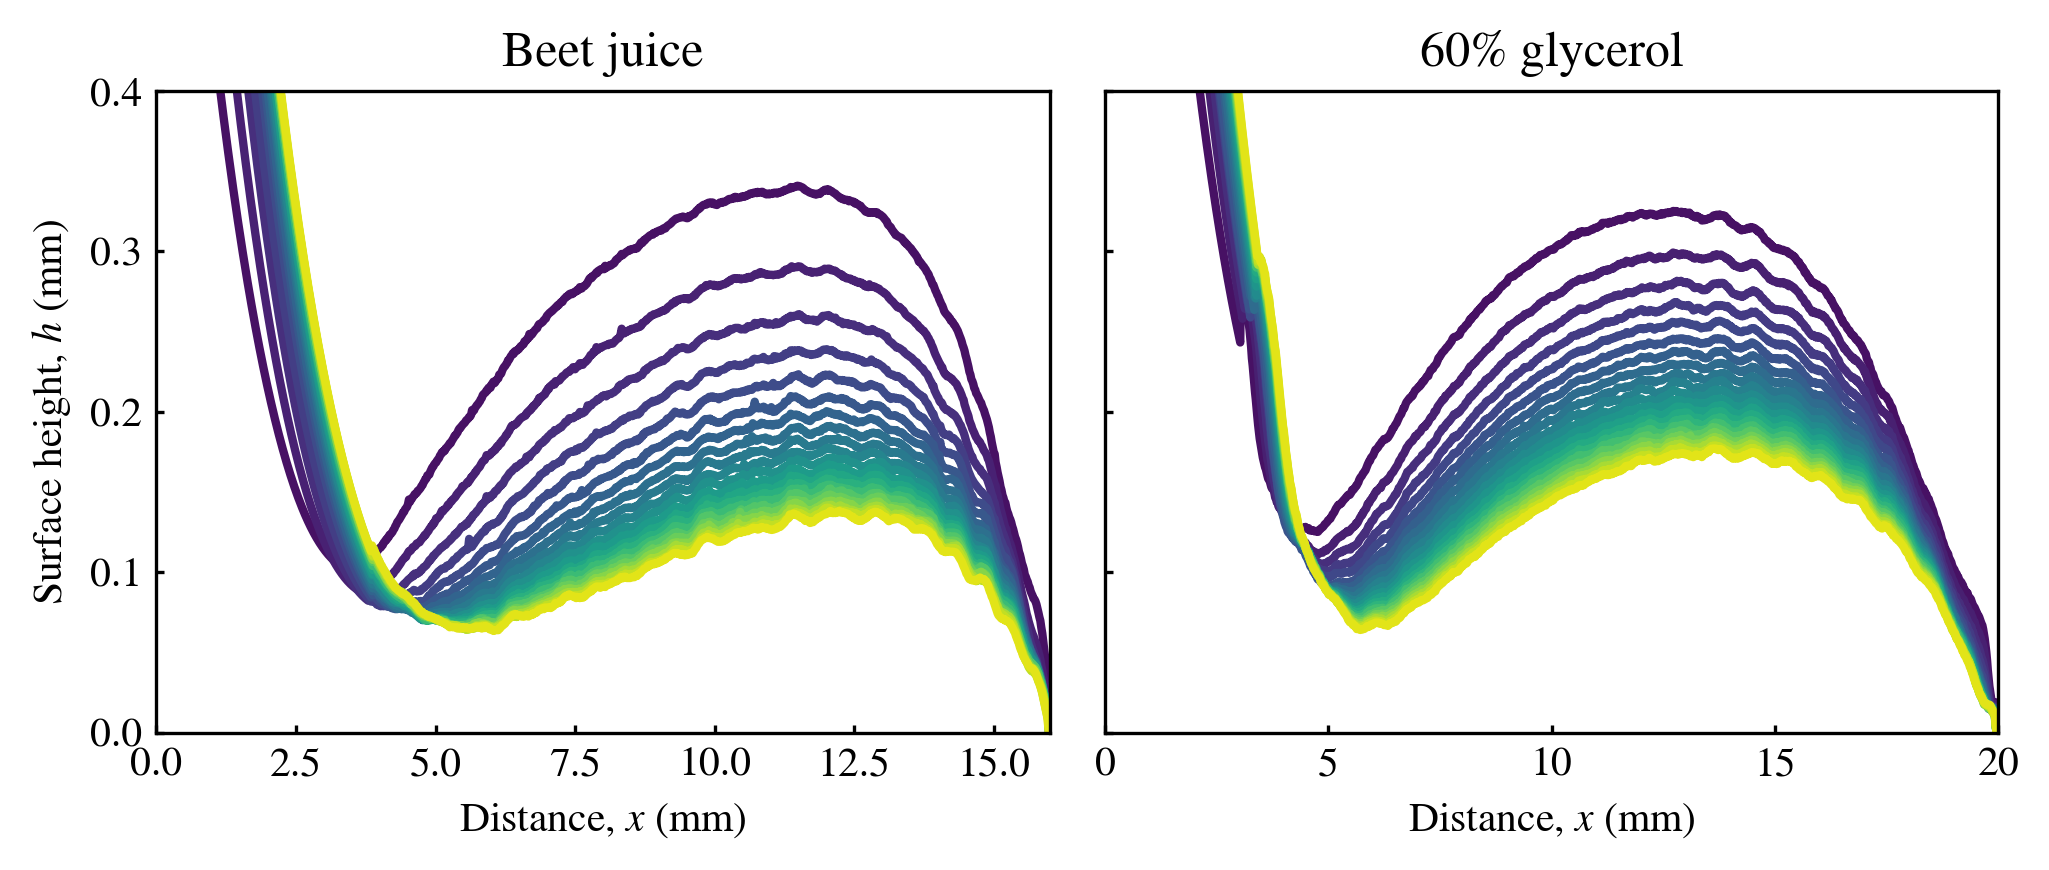

In [20]:
folder = os.path.join(base_folder, "08212024", "surface_profile")
name = "beetjuice_3_0.305"
df = pd.read_csv(os.path.join(folder, name+".csv")).set_index("x")
dimple = pd.read_csv(os.path.join(folder, "dimple_detection", name+".csv"))

fig, ax = plt.subplots(1, 2, figsize=(7, 3), dpi=300, sharey=True)
down_sample = 2
cmap = plt.get_cmap("viridis")
tmax = float(df.columns[-1])
n_curves = df.shape[1]
for i in range(2, n_curves-1, down_sample):
    # read surface profile data for smoothing purpose
    x, y = df.index, df.iloc[:, i].values
    ax[0].plot(x, y, color=cmap(i/n_curves), lw=2)
    min_ind = dimple.loc[i//2, "minima_index"]
    max_ind = dimple.loc[i//2, "maxima_index"]
    if np.isnan(min_ind) or np.isnan(max_ind):
        continue
    # ax.scatter(x[int(min_ind)], dimple.loc[i//2, "minima"], color="blue", s=5, zorder=10)
    # ax.scatter(x[int(max_ind)], dimple.loc[i//2, "maxima"], color="red", s=5, zorder=10)

ax[0].set_xlim([0, 16])
ax[0].set_ylim([0, 0.4])
ax[0].set_xlabel("Distance, $x$ (mm)")
ax[0].set_ylabel("Surface height, $h$ (mm)")
ax[0].set_title("Beet juice")
folder = os.path.join(base_folder, "11122024", "surface_profile")
name = "gw60-15_0.253"
df = pd.read_csv(os.path.join(folder, name+".csv")).set_index("x")
tmax = float(df.columns[-1])
n_curves = df.shape[1]
for i in range(2, n_curves-1, down_sample):
    # read surface profile data for smoothing purpose
    x, y = df.index, df.iloc[:, i].values
    ax[1].plot(x, y, color=cmap(i/n_curves), lw=2)
    if np.isnan(min_ind) or np.isnan(max_ind):
        continue
    # ax.scatter(x[int(min_ind)], dimple.loc[i//2, "minima"], color="blue", s=5, zorder=10)
    # ax.scatter(x[int(max_ind)], dimple.loc[i//2, "maxima"], color="red", s=5, zorder=10)

ax[1].set_xlim([0, 20])
ax[1].set_ylim([0, 0.4])
ax[1].set_xlabel("Distance, $x$ (mm)")
# ax[1].set_ylabel("Surface height, $h$ (mm)")
ax[1].set_title("60% glycerol")

# add a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
# plt.colorbar(sm, ax=ax, label="Time (s)")
plt.tight_layout()